In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [6]:
import csv
import numpy as np
import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [11]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_test.csv to sign_mnist_test.csv


In [12]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        file_csv = csv.reader(training_file, delimiter=',')
        flag = True
        _images = []
        _labels = []
        for row in file_csv:
            if flag: flag = False
            else: 
                data = row[1:785]
                data_array = np.array_split(data, 28)
                _images.append(data_array)
                _labels.append(row[0])
        images = np.array(_images).astype('float')
        labels = np.array(_labels).astype('float')
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=3) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow(
        training_images, training_labels,
        batch_size=32) #YOUR CODE HERE

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1. / 255
)
validation_generator = validation_datagen.flow(testing_images, testing_labels)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [14]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )

# Compile Model. 
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator,
                              steps_per_epoch=len(training_images) / 128,
                              epochs=100,
                              validation_data=validation_generator)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/100
215/214 [==============================] - 3s 14ms/step - loss: 3.1519 - accuracy: 0.0695 - val_loss: 3.0584 - val_accuracy: 0.0646
Epoch 2/100
215/214 [==============================] - 3s 13ms/step - loss: 2.9475 - accuracy: 0.1177 - val_loss: 2.6569 - val_accuracy: 0.1979
Epoch 3/100
215/214 [==============================] - 3s 13ms/step - loss: 2.6882 - accuracy: 0.1797 - val_loss: 2.3764 - val_accuracy: 0.2460
Epoch 4/100
215/214 [==============================] - 3s 13ms/step - loss: 2.4542 - accuracy: 0.2313 - val_loss: 1.9908 - val_accuracy: 0.3452
Epoch 5/100
215/214 [==============================] - 3s 13ms/step - loss: 2.2917 - accuracy: 0.2749 - val_loss: 1.7104 - val_accuracy: 0.4764
Epoch 6/100
215/214 [==============================] - 3s 14ms/step - loss: 2.1777 - accuracy: 0.3115 - val_loss: 1.5490 - val_accuracy: 0.4979
Epoch 7/100
215/214 [==============================] - 3s 13ms/step - loss: 2.0399 - accuracy: 0.3535 - val_loss: 1.6141 - val_accuracy:

[6.92426086682151, 0.56609035]

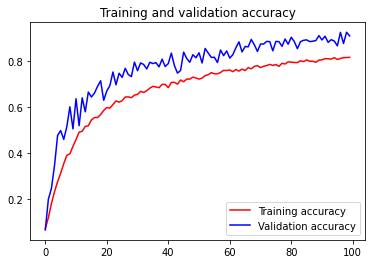

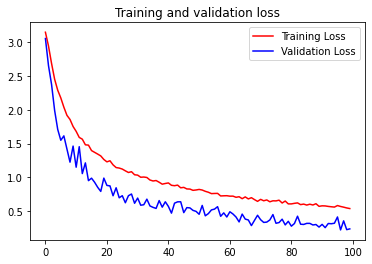

In [16]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()